# Analisis basico de resumen de casos corona virus Guatemala 2020

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [34]:
dir_resumen = '../data/resumen_todos.csv'
casos = pd.read_csv(dir_resumen, header = 0, parse_dates = True)
dir_comida = '../data/resumen_OllaComunitaria.csv'
ollaComunitaria = pd.read_csv(dir_comida, header = 0, parse_dates = True)

# dar formato a fechas
cols_fecha = ["fecha"]
for col in cols_fecha:
    casos[col] = pd.to_datetime(casos[col], yearfirst = True)
    ollaComunitaria[col] = pd.to_datetime(ollaComunitaria[col], yearfirst = True)

# mostrar columnas y tipo de dato
print(casos.info())
casos = casos.dropna()
print(casos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
fecha          129 non-null datetime64[ns]
confirmados    129 non-null int64
recuperados    129 non-null int64
fallecidos     129 non-null int64
activos        129 non-null int64
pruebas        128 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 6.1 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 6 columns):
fecha          128 non-null datetime64[ns]
confirmados    128 non-null int64
recuperados    128 non-null int64
fallecidos     128 non-null int64
activos        128 non-null int64
pruebas        128 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 7.0 KB
None


In [35]:
casos = casos.set_index(keys = 'fecha', drop = True)
ollaComunitaria = ollaComunitaria.set_index(keys = 'fecha', drop = True).fillna(0)

#casos = casos.drop(columns = 'fuente') # ignorar fuente de informacion
# mostrar algunos datos
print(casos.info())
print(ollaComunitaria.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2020-03-13 06:00:00 to 2020-07-18 08:59:00
Data columns (total 5 columns):
confirmados    128 non-null int64
recuperados    128 non-null int64
fallecidos     128 non-null int64
activos        128 non-null int64
pruebas        128 non-null float64
dtypes: float64(1), int64(4)
memory usage: 6.0 KB
None
            Xela (TanLechugaYo)  Capital (Rayuela GT)  \
fecha                                                   
2020-05-01                  0.0                   0.0   
2020-05-02                  0.0                   0.0   
2020-05-03                  0.0                   0.0   
2020-05-04                114.0                   0.0   
2020-05-05                161.0                   0.0   

            Antigua (BanderasBlancas)  AltaVerapaz (Club Social DVictoria)  \
fecha                                                                        
2020-05-01                        0.0                                  0.0  

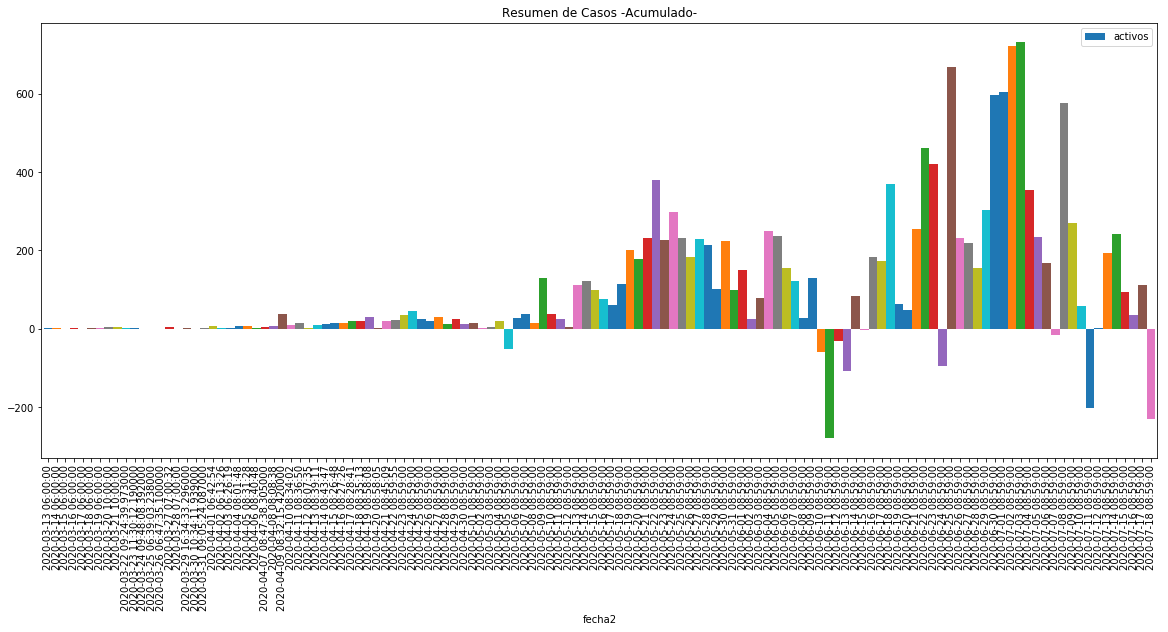

In [36]:
fig1 = plt.figure(figsize=(20,8))
fig1ax1 = fig1.add_subplot(1,1,1)
fig1ax1.set_title('Resumen de Casos -Acumulado-')
reversed_cumsum = casos-casos.shift(1).fillna(0)
reversed_cumsum["fecha2"] = casos.index
reversed_cumsum = reversed_cumsum.set_index(keys = 'fecha2', drop = True)

#print(casos.info())
#print(reversed_cumsum.info())
reversed_cumsum["activos"].plot.bar(ax = fig1ax1 , width = 1)
#casos["fallecidos"].plot(ax = fig1ax1 , marker=".",markersize=20, label="Fallecidos Acumulado")
fig1ax1.legend(loc='best')
#fig1ax1.grid()

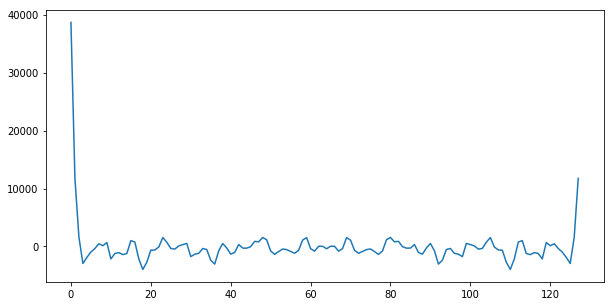

In [37]:
yf = scipy.fftpack.fft(reversed_cumsum["confirmados"])

figa = plt.figure(figsize=(10,5))
figa1 = figa.add_subplot(1,1,1)
figa1.plot(yf)

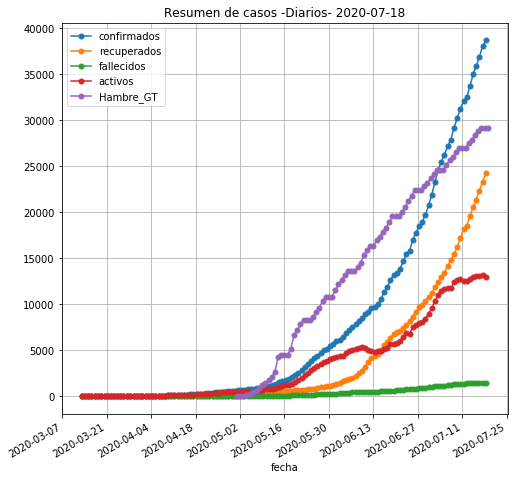

In [38]:
fig2 = plt.figure(figsize=(8,8))
fig2ax1 = fig2.add_subplot(1,1,1)
fig2ax1.set_title('Resumen de casos -Diarios- {}'.format(casos.index.tolist()[-1].strftime('%Y-%m-%d')))
casos[['confirmados','recuperados','fallecidos','activos']].plot( ax = fig2ax1, marker='.',markersize=10)
ollaComunitaria['total_GT'] = ollaComunitaria['Xela (TanLechugaYo)'] \
                              + ollaComunitaria['Capital (Rayuela GT)'] \
                              + ollaComunitaria['Antigua (BanderasBlancas)'] \
                              + ollaComunitaria['AltaVerapaz (Club Social DVictoria)']\
                              + ollaComunitaria['Santiago_Atitlan']
ollaComunitaria['total_SV'] = ollaComunitaria['SanTecla_ElSalvador']
ollaComunitaria['total_GT'].cumsum().plot( ax = fig2ax1, marker='.',markersize=10,label="Hambre_GT")
fig2ax1.legend(loc='best')
fig2ax1.grid()
#fig2.savefig("../imgs/resumen.png".format())


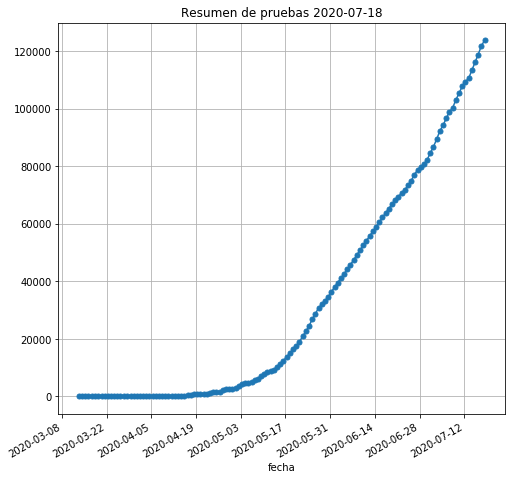

In [39]:
fig3 = plt.figure(figsize=(8,8))
fig3ax1 = fig3.add_subplot(1,1,1)
fig3ax1.set_title('Resumen de pruebas {}'.format(casos.index.tolist()[-1].strftime('%Y-%m-%d')))
casos['pruebas'].plot( ax = fig3ax1, marker='.',markersize=10)
fig3ax1.grid()
#fig3.savefig("../imgs/pruebas.png".format())

In [40]:
print('confirmados: ', max(casos['confirmados']))
print('recuperados: ', max(casos['recuperados']))
print('fallecidos: ', max(casos['fallecidos']))
print('activos: ', max(casos['activos']))
print('pruebas realizadas: ',max(casos['pruebas']))
print('Comida Entregada GT: ', max(ollaComunitaria['total_GT'].cumsum()))
print('Comida Entregada GT: ', max(ollaComunitaria['total_GT'].cumsum()))

confirmados:  38667
recuperados:  24227
fallecidos:  1485
activos:  13186
pruebas realizadas:  123786.0
Comida Entregada GT:  29198.0
Comida Entregada GT:  29198.0


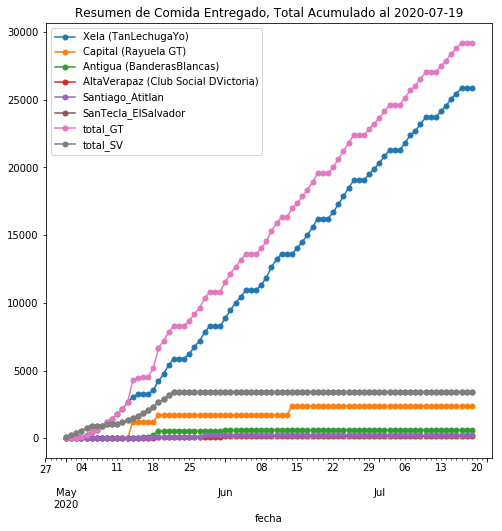

In [41]:
fig3 = plt.figure(figsize=(8,8))
fig3ax1 = fig3.add_subplot(1,1,1)
fig3ax1.set_title('Resumen de Comida Entregado, Total Acumulado al {}'.format(ollaComunitaria.index.tolist()[-1].strftime('%Y-%m-%d')))
ollaComunitaria.cumsum().plot( ax = fig3ax1, marker='.',markersize=10)
#fig3.savefig("../imgs/hambre.png".format())

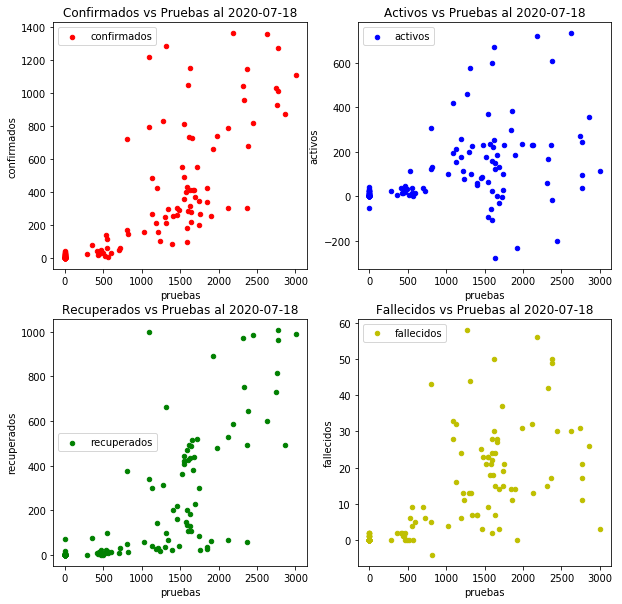

In [42]:
fig4 = plt.figure(figsize=(10,10))
fig4ax1 = fig4.add_subplot(2,2,1)
fig4ax2 = fig4.add_subplot(2,2,2)
fig4ax3 = fig4.add_subplot(2,2,3)
fig4ax4 = fig4.add_subplot(2,2,4)

fig4ax1.set_title('Confirmados vs Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
fig4ax2.set_title('Activos vs Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
fig4ax3.set_title('Recuperados vs Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
fig4ax4.set_title('Fallecidos vs Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))


reversed_cumsum.plot.scatter( x = "pruebas", y = "confirmados", ax = fig4ax1, label = "confirmados", c="r")#, marker='.',markersize=10)
reversed_cumsum.plot.scatter( x = "pruebas", y = "activos", ax = fig4ax2, label = "activos", c = "b")#, marker='.',markersize=10)
reversed_cumsum.plot.scatter( x = "pruebas", y = "recuperados", ax = fig4ax3, label = "recuperados", c= "g")#, marker='.',markersize=10)
reversed_cumsum.plot.scatter( x = "pruebas", y = "fallecidos", ax = fig4ax4, label = "fallecidos", c = "y")#, marker='.',markersize=10)


#fig3.savefig("../imgs/hambre.png".format())

In [43]:
print("Covarianza")
#for column in casos.columns:
#    casos[column] = casos[column] / casos[column].mean()
print(reversed_cumsum.corr())

Covarianza
             confirmados  recuperados  fallecidos   activos   pruebas
confirmados     1.000000     0.890352    0.803026  0.687107  0.801122
recuperados     0.890352     1.000000    0.606330  0.281631  0.759266
fallecidos      0.803026     0.606330    1.000000  0.700223  0.685825
activos         0.687107     0.281631    0.700223  1.000000  0.471654
pruebas         0.801122     0.759266    0.685825  0.471654  1.000000


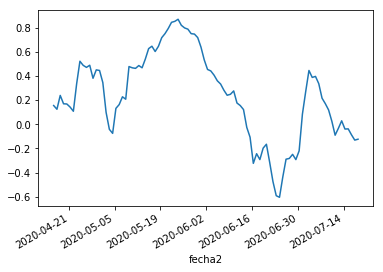

In [44]:

reversed_cumsum["pruebas"].rolling(20).corr(other=reversed_cumsum["activos"]).plot()

In [45]:
reversed_cumsum["pruebas"].count()


128

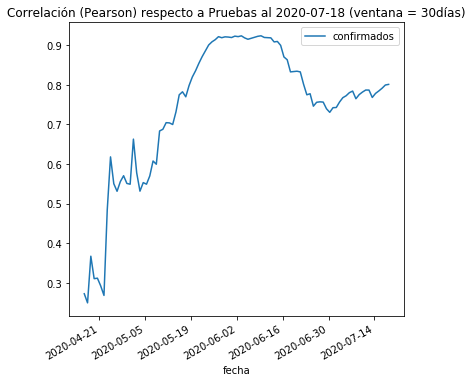

In [46]:
fecha_inicio = reversed_cumsum.index.tolist()[0]
fecha_fin = reversed_cumsum.index.tolist()[-1]
idx = pd.IndexSlice

fig5 = plt.figure(figsize=(6,6))
fig5ax1 = fig5.add_subplot(1,1,1)
#fig5ax2 = fig5.add_subplot(2,2,2)
#fig5ax3 = fig5.add_subplot(2,2,3)
#fig5ax4 = fig5.add_subplot(2,2,4)

fig5ax1.set_title('Correlación (Pearson) respecto a Pruebas al {} (ventana = 30días)'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
#fig5ax2.set_title('Activos y Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
#fig5ax3.set_title('Recuperados y Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
#fig5ax4.set_title('Fallecidos y Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
#fig5ax1.set_yticks(np.arange(0,1,0.1))

ventana="30d"
a = reversed_cumsum.rolling(ventana).corr().loc[idx[:, 'pruebas'], idx['confirmados']]
b = reversed_cumsum.rolling(ventana).corr().loc[idx[:, 'pruebas'], idx['activos']]
c = reversed_cumsum.rolling(ventana).corr().loc[idx[:, 'pruebas'], idx['recuperados']]
d = reversed_cumsum.rolling(ventana).corr().loc[idx[:, 'pruebas'], idx['fallecidos']]

a.index.names = ["fecha","tipo"]
a.index = a.index.droplevel("tipo")
b.index.names = ["fecha","tipo"]
b.index = b.index.droplevel("tipo")
c.index.names = ["fecha","tipo"]
c.index = c.index.droplevel("tipo")
d.index.names = ["fecha","tipo"]
d.index = d.index.droplevel("tipo")
a.plot(ax=fig5ax1)
#b.plot(ax=fig5ax1)
#c.plot(ax=fig5ax1)
#d.plot(ax=fig5ax1)

#fig5ax1.set_xticks(reversed_cumsum.index.tolist())

fig5ax1.legend(loc="best")
